### Logistic Regression Exercise

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.metrics import log_loss, roc_auc_score, plot_roc_curve, roc_curve

In [24]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target


* print the shape of X

In [3]:
print(X.shape)

(150, 4)


* print y

In [4]:
print(y)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

* create a logistic regression model
    - **Note:** Spend some time on the logistic regression documentation to get familiar with the available parameters.

In [7]:

clf = linear_model.LogisticRegression(random_state=0).fit(X_train, y_train)

* create a regularization space for the **'penalty'** parameter (a.k.a. what values do we want to insert into our GridSearch?)

In [8]:
penalty_space = ['l2', 'none']

* create a regularization space for the **'c'** parameter (a.k.a. what values do we want to insert into our GridSearch?)

In [9]:
c_space = [0.001, 0.1, 1, 10]

* create a hyperparameter options dictionary

In [10]:
param_dict = {'penalty': penalty_space, 'C': c_space, }

* create a grid search using 5-fold cross validation

In [11]:
clf = GridSearchCV(estimator=linear_model.LogisticRegression(), param_grid=param_dict, n_jobs=-1)



* fit the grid search

In [12]:
clf.fit(X_train, y_train)

/home/kyle/anaconda3/envs/Python3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 1, 10], 'penalty': ['l2', 'none']})

* take the best model from grid search

In [13]:
print('Best score for data1:', clf.best_score_)


Best score for data1: 0.9619047619047618


* print the best hyperparameters

In [14]:
print('Best C:', clf.best_estimator_.C)
print('Best penalty:', clf.best_estimator_.penalty)

Best C: 0.001
Best penalty: none


In [15]:
model_best = linear_model.LogisticRegression(penalty='none').fit(scaler.transform(X_train), y_train)

* predict the target vector
    - class ( *predict* )
    - probabilities ( *predict_proba* )

In [16]:
test_prob = model_best.predict_proba(X_train)[:, 1]
test_pred = model_best.predict(X_train)

- plot the ROC curve and print the AUC

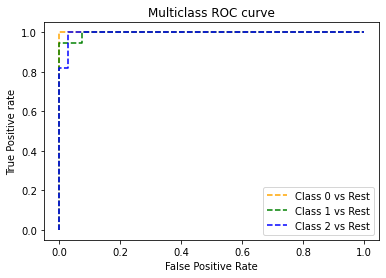

In [22]:
clf = OneVsRestClassifier(model_best)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)


# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

* print the Logreg coeficients

In [18]:
model_best.coef_

array([[   49.14260239,  1092.02079059,  -845.66143595, -3747.1309886 ],
       [   12.80591599,  -532.09399878,  -112.24375699,  1777.40078616],
       [  -61.94851837,  -559.9267918 ,   957.90519294,  1969.73020244]])

* print the Logreg intercepts

In [19]:
model_best.intercept_

array([-753.63245957, -321.2724729 , 1074.90493247])